In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
from calculations.calculations import get_company_name
from datetime import timedelta

In [11]:
stock = yf.download('^SPX', period='3mo', interval='1h')
data = stock.tz_convert('CET')

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


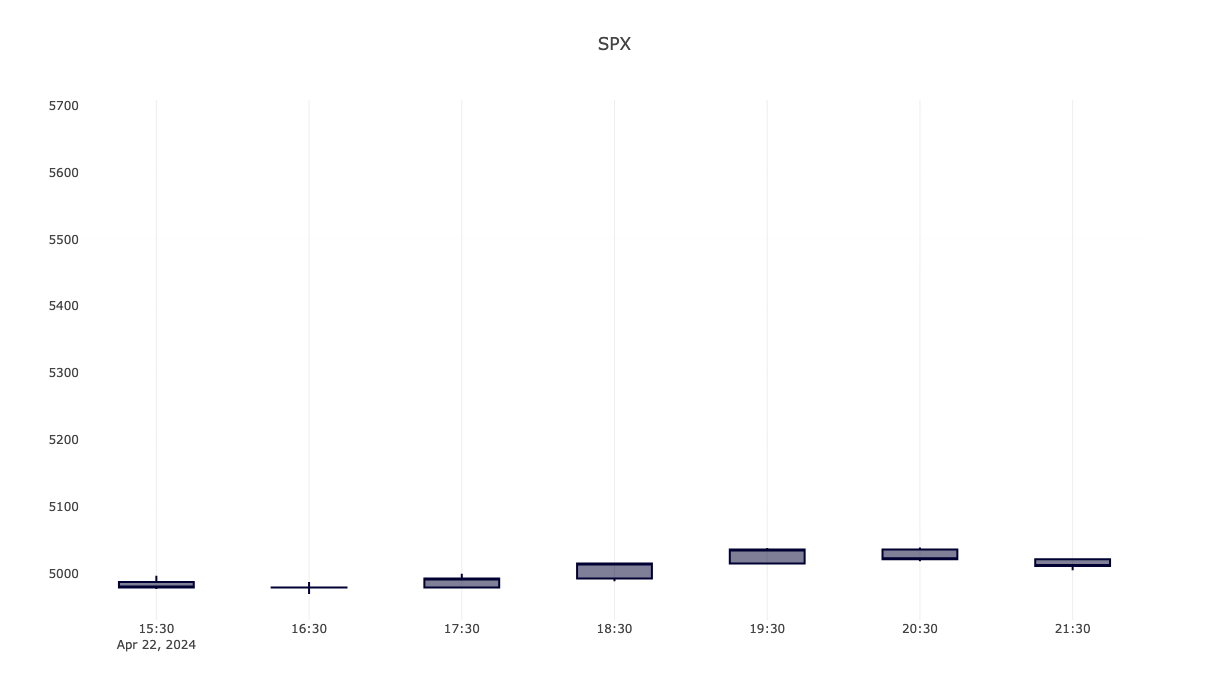

In [24]:
# Descargar datos
stock = yf.download('^SPX', period='3mo', interval='1h')
data = stock.tz_convert('CET')

# Convertir índice a Datetime
data['Datetime'] = pd.to_datetime(data.index)

# Crear subgráfico
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.05)

# Agregar vela japonesa
fig.add_trace(go.Candlestick(x=data.index,
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'],
                             name='Candlestick'))

# Crear conjunto de todos los tiempos que deberían estar en los datos
start = data['Datetime'].min()
end = data['Datetime'].max()
all_times = pd.date_range(start=start, end=end, freq='1h')

# Filtrar solo las horas de trading (asumiendo 9:30 a 16:00, ajustar según sea necesario)
trading_times = all_times[(all_times.hour >= 9) & (all_times.hour < 17) & (all_times.weekday < 5)]

# Encontrar los tiempos faltantes
missing_times = set(trading_times) - set(data['Datetime'])

# Actualizar rangos de ejes para excluir tiempos faltantes
fig.update_xaxes(rangebreaks=[dict(values=list(missing_times))])

# Actualizar el layout del gráfico
fig.update_layout(title=f'SPX', 
                  xaxis_title='', yaxis_title='',
                  yaxis=dict(gridcolor='rgba(200, 200, 200, 0.03)', gridwidth=1),
                  xaxis_rangeslider_visible=False,
                  height=700,
                  dragmode='drawline',
                  shapes=[],
                  newshape=dict(line=dict(color="red")),
                  modebar_add=['drawline','eraseshape'],
                  showlegend=False)

fig.show()

In [26]:
trading_times

DatetimeIndex(['2024-04-22 15:30:00+02:00', '2024-04-22 16:30:00+02:00',
               '2024-04-23 09:30:00+02:00', '2024-04-23 10:30:00+02:00',
               '2024-04-23 11:30:00+02:00', '2024-04-23 12:30:00+02:00',
               '2024-04-23 13:30:00+02:00', '2024-04-23 14:30:00+02:00',
               '2024-04-23 15:30:00+02:00', '2024-04-23 16:30:00+02:00',
               ...
               '2024-07-18 15:30:00+02:00', '2024-07-18 16:30:00+02:00',
               '2024-07-19 09:30:00+02:00', '2024-07-19 10:30:00+02:00',
               '2024-07-19 11:30:00+02:00', '2024-07-19 12:30:00+02:00',
               '2024-07-19 13:30:00+02:00', '2024-07-19 14:30:00+02:00',
               '2024-07-19 15:30:00+02:00', '2024-07-19 16:30:00+02:00'],
              dtype='datetime64[ns, CET]', length=514, freq=None)